In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [5]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [6]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
df['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


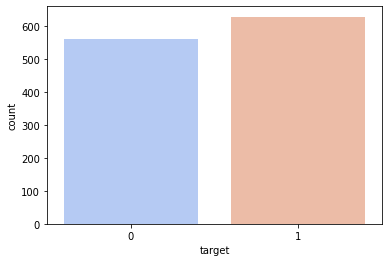

1    909
0    281
Name: sex, dtype: int64

In [9]:
sns.countplot(x="target", data=df, palette="coolwarm")
plt.show()

df['sex'].value_counts()



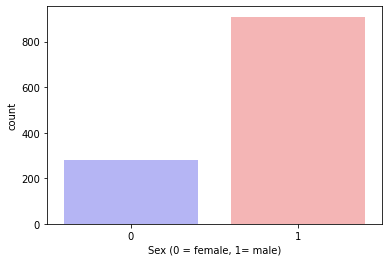

In [10]:
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

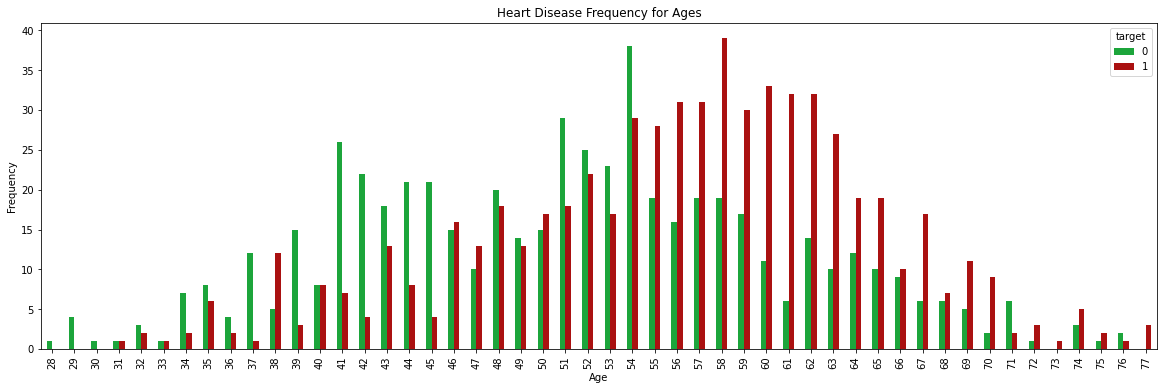

In [11]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


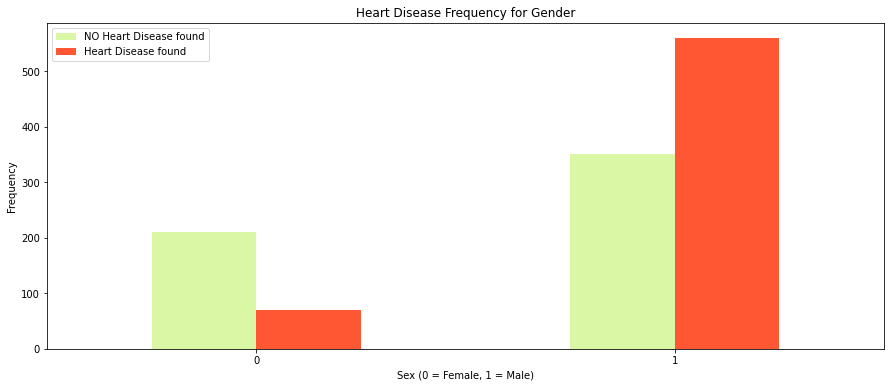

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["NO Heart Disease found", "Heart Disease found"])
plt.ylabel('Frequency')
plt.show()


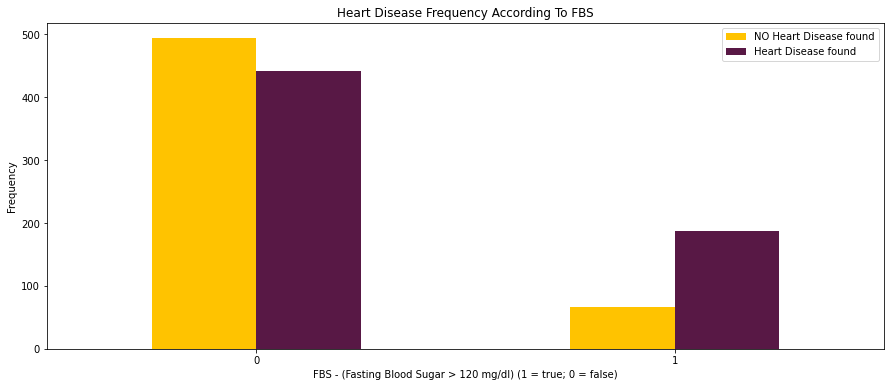

In [16]:


pd.crosstab(df['fasting blood sugar'] ,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["NO Heart Disease found", "Heart Disease found"])
plt.ylabel('Frequency')
plt.show()



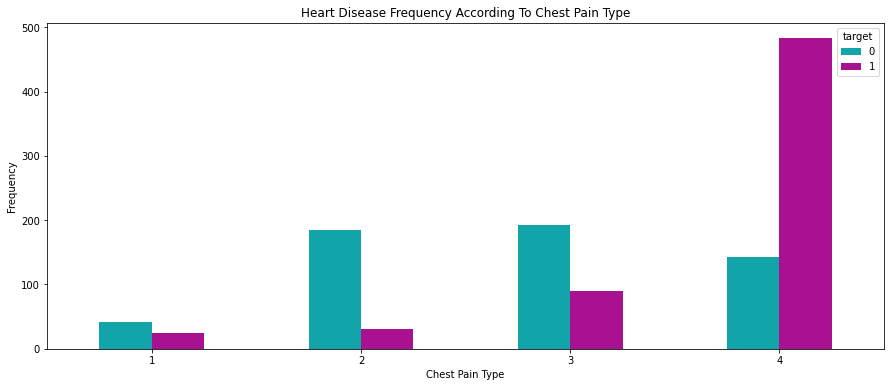

In [18]:
pd.crosstab(df['chest pain type'],df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()



In [19]:
X = df.drop(columns='target',axis = 1)
Y = df['target']

In [21]:
print(X)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [22]:
print(Y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


In [25]:
X_train,X_test,Y_train,Y_split = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape, X_test.shape)

(1190, 11) (952, 11) (238, 11)


***Test Size = 0.2 indicates 20 % data from dataset is the test part meaning 238 is the test part and remaining 952 is the training part***

In [32]:
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train,Y_train)

acc = lr.score(X_train, Y_train)*100
accuracies['LOGISTIC REGRESSION'] = acc
print("LOGISTIC REGRESSION Accuracy Score : {:.2f}%".format(acc))



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

acc = rf.score(X_train, Y_train)*100
accuracies['RANDOM FOREST'] = acc
print("RANDOM FOREST Algorithm Accuracy Score : {:.2f}%".format(acc))



from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(X_train, Y_train)

acc = knn.score(X_train, Y_train)*100
accuracies['KNN'] = acc
print("KNN Algorithm Accuracy Score : {:.2f}%".format(acc))




from sklearn.svm import SVC  
svm = SVC()
svm.fit(X_train, Y_train)

acc = svm.score(X_train,Y_train)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))




from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(X_train, Y_train)  

acc = nb.score(X_train, Y_train)*100
accuracies['NAIVE BAYES'] = acc
print("NAIVE BAYES Algorithm Accuracy Score : {:.2f}%".format(acc))




from sklearn.tree import DecisionTreeClassifier  
dt= DecisionTreeClassifier()  
dt.fit(X_train,Y_train)  

acc = dt.score(X_train, Y_train)*100
accuracies['DECISION TREE'] = acc
print("DECISION TREE Algorithm Accuracy Score : {:.2f}%".format(acc))

c:\users\shobh\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION Accuracy Score : 82.56%
RANDOM FOREST Algorithm Accuracy Score : 100.00%
KNN Algorithm Accuracy Score : 79.20%
Train Accuracy of SVM Algorithm: 70.80%
NAIVE BAYES Algorithm Accuracy Score : 84.03%
DECISION TREE Algorithm Accuracy Score : 100.00%


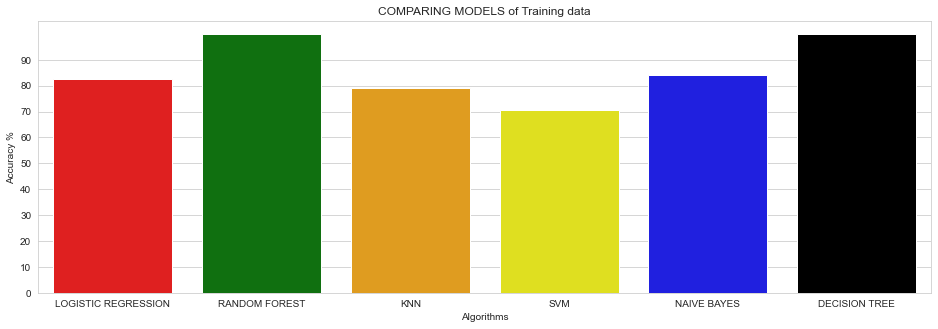

In [33]:
colors = ["red","green","orange","yellow","blue","black"]
sns.set_style("whitegrid")

plt.figure(figsize=(16,5))
plt.title('COMPARING MODELS of Training data')
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()



In [30]:

acc = lr.score(X_test, Y_split)*100
accuracies['LOGISTIC REGRESSION'] = acc
print("LOGISTIC REGRESSION Accuracy Score : {:.2f}%".format(acc))

acc = dt.score(X_test, Y_split)*100
accuracies['DECISION TREE'] = acc
print("DECISION TREE Accuracy Score : {:.2f}%".format(acc))

acc = nb.score(X_test, Y_split)*100
accuracies['NAIVE BAYES'] = acc
print("NAIVE BAYES Accuracy Score : {:.2f}%".format(acc))

acc = knn.score(X_test, Y_split)*100
accuracies['KNN'] = acc
print("KNN Accuracy Score : {:.2f}%".format(acc))

acc = svm.score(X_test, Y_split)*100
accuracies['SVM'] = acc
print("SVM Accuracy Score : {:.2f}%".format(acc))

acc = rf.score(X_test, Y_split)*100
accuracies['RANDOM FOREST'] = acc
print("RANDOM FOREST Accuracy Score : {:.2f}%".format(acc))



LOGISTIC REGRESSION Accuracy Score : 81.09%
DECISION TREE Accuracy Score : 91.18%
NAIVE BAYES Accuracy Score : 82.77%
KNN Accuracy Score : 70.59%
SVM Accuracy Score : 73.53%
RANDOM FOREST Accuracy Score : 92.86%


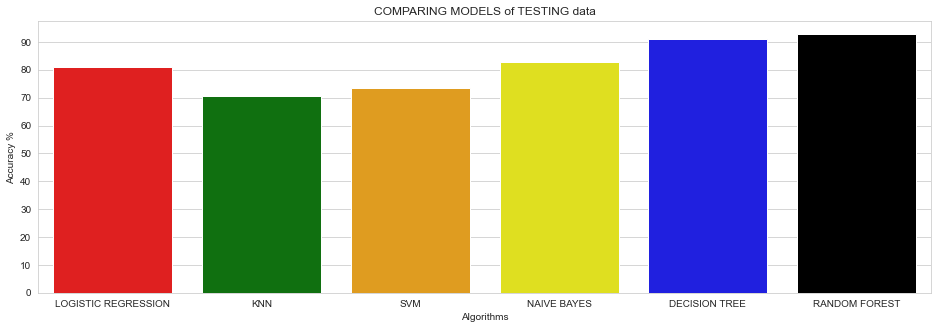

In [31]:
colors = ["red","green","orange","yellow","blue","black"]
sns.set_style("whitegrid")

plt.figure(figsize=(16,5))
plt.title('COMPARING MODELS of TESTING data')
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()



In [34]:

y_head_lr = lr.predict(X_test)
y_head_rf = rf.predict(X_test)
y_head_knn = knn.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dtc = dt.predict(X_test)



In [35]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(Y_split,y_head_lr)
cm_knn = confusion_matrix(Y_split,y_head_knn)
cm_svm = confusion_matrix(Y_split,y_head_svm)
cm_nb = confusion_matrix(Y_split,y_head_nb)
cm_dtc = confusion_matrix(Y_split,y_head_dtc)
cm_rf = confusion_matrix(Y_split,y_head_rf)



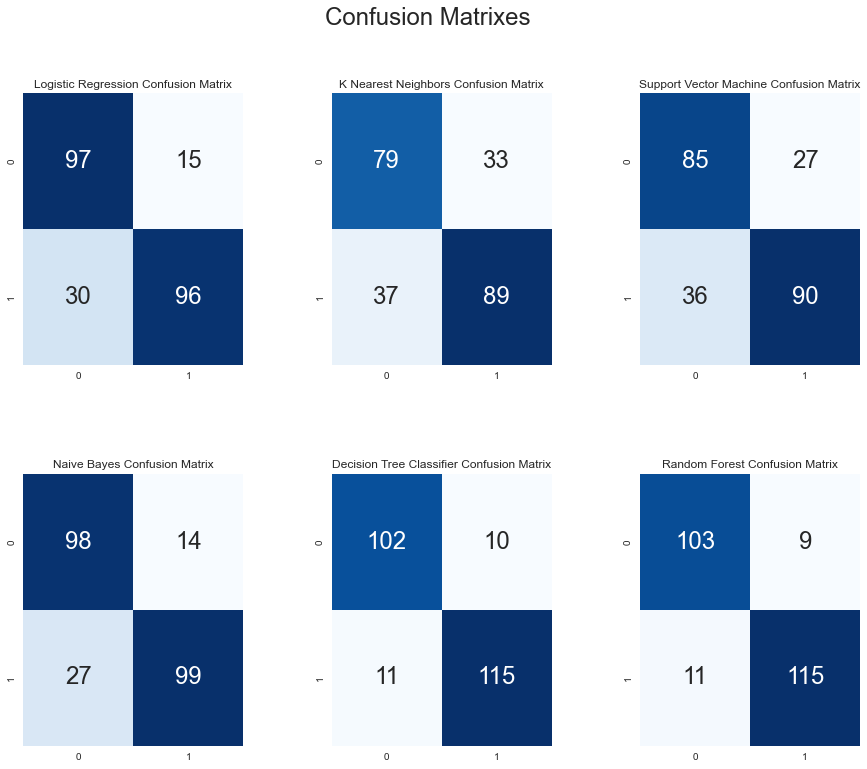

In [36]:

plt.figure(figsize=(15,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


In [37]:
X_test.shape

(238, 11)

In [39]:
import pickle



filename = 'trainedfinalheartmodel1.sav'
pickle.dump(rf, open(filename, 'wb'))




loaded_model = pickle.load(open('trainedfinalheartmodel1.sav', 'rb'))



## Voting Classifer

In [41]:

input_data = (57,1,4,130,131,0,0,115,1,1.2,2)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model.predict(input_reshape)
print(prediction)



if (prediction[0]==0):
    print('The person does not heart disease')
else:
    print('The person has heart disease')



[1]
The person has heart disease
